In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from urllib.request import urlopen

In [5]:
df = pd.read_excel('Demand Forecasting.xlsx',index_col=[0], parse_dates=[0])
df.head()

,Actual Units Recevied,Discount
Day,,
2018-07-12,111,0
2018-07-13,398,0
2018-07-14,188,0
2018-07-15,506,0
2018-07-16,304,0


In [6]:
df

,Actual Units Recevied,Discount
Day,,
2018-07-12,111,0
2018-07-13,398,0
2018-07-14,188,0
2018-07-15,506,0
2018-07-16,304,0
...,...,...
2020-05-27,514,30
2020-05-28,526,30
2020-05-29,443,30


In [7]:
series_value = df.values
series_value

array([[111,   0],
       [398,   0],
       [188,   0],
       ...,
       [443,  30],
       [522,  30],
       [577,  30]], dtype=int64)

In [8]:
df.describe()
df.size

1380

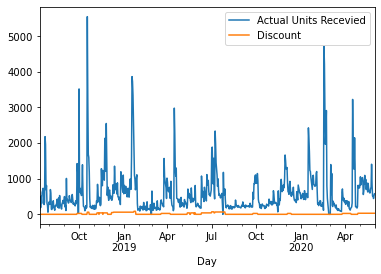

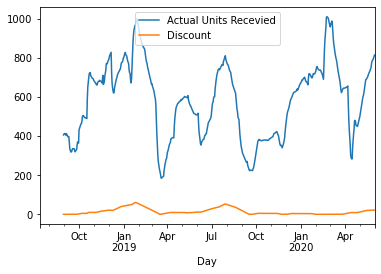

In [9]:
df.plot()
df_mean = df.rolling(window =50).mean()
df_mean.plot()

In [10]:
dataFrame_value = pd.DataFrame(series_value)
day_df = pd.concat([dataFrame_value , dataFrame_value.shift(1)],axis=1)

In [11]:
day_df.columns = ['ActualUnits', 'Discount','ForecastedUnits','ForecastedDiscount']
day_df

,ActualUnits,Discount,ForecastedUnits,ForecastedDiscount
0,111,0,NaN,NaN
1,398,0,111.0,0.0
2,188,0,398.0,0.0
3,506,0,188.0,0.0
4,304,0,506.0,0.0
...,...,...,...,...
685,514,30,822.0,30.0
686,526,30,514.0,30.0
687,443,30,526.0,30.0
688,522,30,443.0,30.0


In [12]:
unit_test = day_df[1:]
unit_test

,ActualUnits,Discount,ForecastedUnits,ForecastedDiscount
1,398,0,111.0,0.0
2,188,0,398.0,0.0
3,506,0,188.0,0.0
4,304,0,506.0,0.0
5,613,0,304.0,0.0
...,...,...,...,...
685,514,30,822.0,30.0
686,526,30,514.0,30.0
687,443,30,526.0,30.0
688,522,30,443.0,30.0


In [13]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

In [14]:
df.size

1380

In [17]:
unit_test = df[0:20]
unit_train = df[21:1380]

In [18]:
from statsmodels.tsa.vector_ar.var_model import VAR


model=VAR(endog = unit_train)
model_fit = model.fit()

prediction = model_fit.forecast(model_fit.y , steps=len(unit_train))

c:\users\cnpl new-007\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\cnpl new-007\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [19]:
prediction

array([[615.66591958,  28.77647538],
       [636.67066273,  27.67630007],
       [647.05773116,  26.67955867],
       ...,
       [588.67999753,  15.44736484],
       [588.67999753,  15.44736484],
       [588.67999753,  15.44736484]])

In [42]:
model = VAR(endog = prediction)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y , steps =len(prediction))
print(yhat)

[[588.67999753  15.44736484]
 [588.67999753  15.44736484]
 [588.67999753  15.44736484]
 ...
 [588.67999753  15.44736484]
 [588.67999753  15.44736484]
 [588.67999753  15.44736484]]


In [43]:
from sklearn.datasets import load_boston

In [44]:
boston = pd.DataFrame(yhat)

In [45]:
boston.head()

,0,1
0,588.679998,15.447365
1,588.679998,15.447365
2,588.679998,15.447365
3,588.679998,15.447365
4,588.679998,15.447365


In [46]:
outliers=[]

def detect_outliers(prediction):
    
    threshold = 1
    mean = np.mean(prediction)
    std = np.std(prediction)
    
    
    for i in prediction:
        z_score = (i-mean)/std
        if np.abs(z_score).all()>threshold:
            outliers.append(i)
            
    return outliers        

In [47]:
series_list = df.values.tolist()
outliers_pt = detect_outliers(series_list)

In [48]:
outliers_pt.count(all)

0

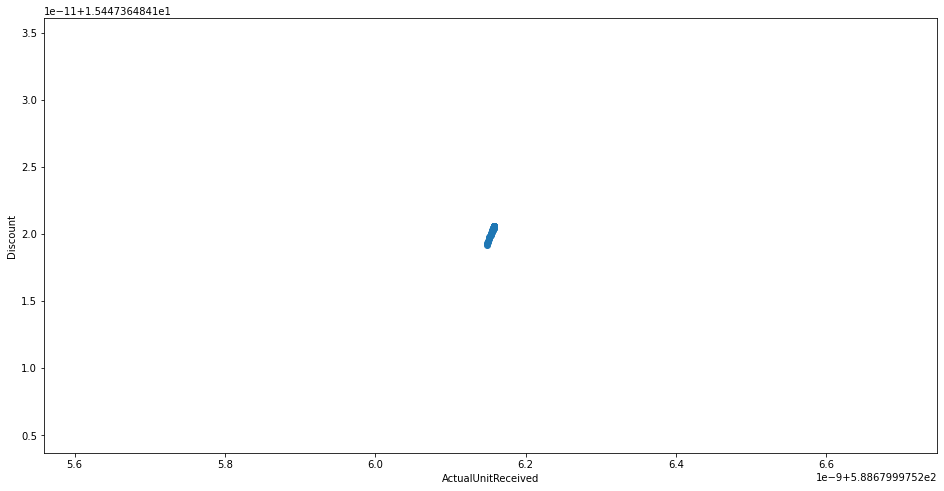

In [49]:
fiz,ax = plt.subplots(figsize=(16,8))
ax.scatter(boston[0],boston[1])
ax.set_xlabel('ActualUnitReceived')
ax.set_ylabel('Discount')

plt.show()

In [50]:
from scipy import stats
zscore = np.abs(stats.zscore(boston))

In [51]:
print(zscore)

[[2.78472725 7.9669943 ]
 [2.71894629 7.27615004]
 [2.60931136 6.64101903]
 ...
 [0.94286041 0.70198691]
 [0.94286041 0.70198691]
 [0.94286041 0.70198691]]


In [52]:
boston.columns=['ActualUnits','Discount']
boston

,ActualUnits,Discount
0,588.679998,15.447365
1,588.679998,15.447365
2,588.679998,15.447365
3,588.679998,15.447365
4,588.679998,15.447365
...,...,...
664,588.679998,15.447365
665,588.679998,15.447365
666,588.679998,15.447365
667,588.679998,15.447365


In [53]:
unit_error = mean_squared_error(boston.ActualUnits,boston.Discount)

In [54]:
unit_error

328595.65117467544